# Proyecto Forbes 2000 - 2021 
## Manipulación y transformación de datos con Pandas y Numpy
01.07.23

**Pandas**: paquete enfocado en la manipulación y análisis de datos. Está construido sobre Numpy, requiero poco código para manipular datos. Soporta múltiples formatos de atchivos. 

Pandas trabaja don cos objetos que derivan de los array de Numpy:
1. Pandas Series: array unidimensional de np o vector.
2. DataFrame: estructura principal de Pandas (Matriz).

In [2]:
# Importemos librerías de trabajo
# pip list : me muestra qué paquetes tengo instalados
# pip install : instalo los paquete que desee

import os #Para directorio de trabajo
import numpy as np #Métodos numéricos y arrays
import pandas as pd #Manipulación de DF

In [3]:
# Pandas series = vector

vector = pd.Series(['Julian','Maria','Pedro','Natalia'], index= [3,2,1,4])
print(vector)
print(vector[1])
print(type(vector))

3     Julian
2      Maria
1      Pedro
4    Natalia
dtype: object
Pedro
<class 'pandas.core.series.Series'>


In [4]:
# Accedo a el dato con el indexado establecido
print(vector[1])

# Accedo a varios datos con el indexado
print(vector[[1,4,3]])

Pedro
1      Pedro
4    Natalia
3     Julian
dtype: object


In [5]:
# Para crear un data frame, podemos hacer uso de diccionario

dic = {'Nombres': ['Julian','Maria','Pedro','Natalia'],
       'Edad': [28,30,25,22],
       'Altura': [173,165,178,170]}

print(dic['Nombres'])

df_flia = pd.DataFrame(dic)

['Julian', 'Maria', 'Pedro', 'Natalia']


In [6]:
print(df_flia)

   Nombres  Edad  Altura
0   Julian    28     173
1    Maria    30     165
2    Pedro    25     178
3  Natalia    22     170


In [7]:
# Filtros o slicing

df_flia[1:3] # Filas de la 1 a la 3
df_flia[:] # Todo el DF
df_flia['Edad'] # Edad
df_flia[2:3]['Edad'] #Edad de Pedro

2    25
Name: Edad, dtype: int64

## Proyecto Forbes

### Fortune Global 2000 Companies (2021)
Fortune Global 2000 Companies with Sales, Profits, Assets, Market Value

List of top 2000 companies with their total sales, total profits, total assets, and total market value

Since 2003, Forbes’ Global 2000 list has measured the world’s largest public companies in terms of four equally weighted metrics: assets, market value, sales and profits. Last year’s edition offered a glimpse into the early economic implications of the Covid-19 pandemic. Now, we see the results over 12 months of market turmoil and unfathomable human loss.

### Features

- ranking   : Ranking
- Name    : Name de la compania
- Country      : Country de procedencia de la compania
- Sales    : Sales
- Profits : Profits
- Assets   : Assets
- Market_value     : Market_value de la compania en el mercado


*Nota: cifras en millones de dolares


Source: https://www.forbes.com/lists/global2000/#7e9e39675ac0

In [13]:
# Establezcamos directorio de trabajo
os.chdir('/Users/carlospinilla/Documents/ibero/IA/Inteligencia_artificial-main')

In [8]:
os.getcwd() #Muestreme el directorio de trabajo
os.listdir() #Archivos en el ditrectorio de trabajo

['Project kmeans customer.ipynb',
 'Mall_Customers.csv',
 'caracteristicas de vinos.csv',
 '3. PandasForbes.ipynb',
 'Forbes 2000 2022.csv',
 'forbes2023.csv',
 'Forbes 2000 2021.csv',
 '1. Introduccion.ipynb',
 '.ipynb_checkpoints',
 '2. Numpy.ipynb',
 'Explicacion del modelo kmeans.ipynb']

In [19]:
# Importar base de datos

forbes21 = pd.read_csv('forbes2023.csv',encoding= 'latin-1',sep=';')

In [20]:
forbes21

,Rank,Company Name,Country,Sales\n($millions),Profits\n($millions),Assets\n($millions),Market Value \nAs of 05/05/23 ($m)
0,1,JPMorgan Chase,United States,179930,41800,3744300,399590
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589470,156360,660990,2055220
2,3,ICBC,China,216770,52470,6116820,203010
3,4,China Construction Bank,China,203080,48250,4977480,172990
4,5,Agricultural Bank of China,China,186140,37920,5356860,141820
...,...,...,...,...,...,...,...
1995,1996,Alfa Laval,Sweden,5350,"489,5",7820,15600
1996,1996,Gap,United States,15620,-202,11390,3170
1997,1996,Yes Bank,India,3340,"91,6",43220,5600
1998,1999,BEKB-BCBE,Switzerland,556,"167,1",42970,2490


In [21]:
# Para ver la FORMA del DF
forbes21.shape # (Fila,columna)

(2000, 7)

In [22]:
### Data cleaning 

# Qué variables tengo

forbes21.columns

Index(['Rank', 'Company Name', 'Country', 'Sales\n($millions)',
       'Profits\n($millions)', 'Assets\n($millions)',
       'Market Value \nAs of 05/05/23 ($m)'],
      dtype='object')

In [23]:
#Cambiar nombre de variables
forbes21.columns = ['Rank','Company','Country','Sales','Profits','Assets','Market_value']
forbes21.columns

Index(['Rank', 'Company', 'Country', 'Sales', 'Profits', 'Assets',
       'Market_value'],
      dtype='object')

In [24]:
forbes21.head(n=10) # Top 10 de las empresas de Forbes 21
#forbes21.tail(n=9) #Las últimas 5

,Rank,Company,Country,Sales,Profits,Assets,Market_value
0,1,JPMorgan Chase,United States,179930,41800,3744300,399590
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589470,156360,660990,2055220
2,3,ICBC,China,216770,52470,6116820,203010
3,4,China Construction Bank,China,203080,48250,4977480,172990
4,5,Agricultural Bank of China,China,186140,37920,5356860,141820
5,6,Bank of America,United States,133840,28620,3194660,220820
6,7,Alphabet,United States,282850,58590,369490,1340530
7,8,ExxonMobil,United States,393160,61690,369370,439390
8,9,Microsoft,United States,207590,69020,380090,2309840
9,10,Apple,United States,385100,94320,332160,2746210


In [25]:
forbes21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          2000 non-null   int64 
 1   Company       2000 non-null   object
 2   Country       2000 non-null   object
 3   Sales         2000 non-null   int64 
 4   Profits       2000 non-null   object
 5   Assets        2000 non-null   int64 
 6   Market_value  2000 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 109.5+ KB


In [26]:
forbes21.isna().any()

Rank            False
Company         False
Country         False
Sales           False
Profits         False
Assets          False
Market_value    False
dtype: bool

In [27]:
# Modifiquemos el formato de los datos (Coerción de datos)

forbes21 = forbes21.replace(',','',regex= True) # regex: expresión regular
forbes21.head()

,Rank,Company,Country,Sales,Profits,Assets,Market_value
0,1,JPMorgan Chase,United States,179930,41800,3744300,399590
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589470,156360,660990,2055220
2,3,ICBC,China,216770,52470,6116820,203010
3,4,China Construction Bank,China,203080,48250,4977480,172990
4,5,Agricultural Bank of China,China,186140,37920,5356860,141820


In [28]:
forbes21 = forbes21.replace('\$','',regex=True) #La expresión regular de $ es con \$
forbes21.head()

,Rank,Company,Country,Sales,Profits,Assets,Market_value
0,1,JPMorgan Chase,United States,179930,41800,3744300,399590
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589470,156360,660990,2055220
2,3,ICBC,China,216770,52470,6116820,203010
3,4,China Construction Bank,China,203080,48250,4977480,172990
4,5,Agricultural Bank of China,China,186140,37920,5356860,141820


In [29]:
# Acceder a filas y columnas
# Indexing and slicing

#Cómo acceder indicando filas con indexación
forbes21[:] #Coja todas las filas
forbes21[999:1010]
forbes21[1900:]

,Rank,Company,Country,Sales,Profits,Assets,Market_value
1900,1901,Arab Bank,Jordan,2200,4808,39190,4100
1901,1902,YTO Express Group,China,7940,5769,5870,9120
1902,1903,Nanto Bank,Japan,564,862,49950,579
1903,1904,Tokyo Kiraboshi Financial Group,Japan,843,1762,49930,612
1904,1905,Suzuken,Japan,17540,1468,9880,2230
...,...,...,...,...,...,...,...
1995,1996,Alfa Laval,Sweden,5350,4895,7820,15600
1996,1996,Gap,United States,15620,-202,11390,3170
1997,1996,Yes Bank,India,3340,916,43220,5600
1998,1999,BEKB-BCBE,Switzerland,556,1671,42970,2490


In [30]:
#Acceder a columnas

forbes21['Sales']
forbes21[['Company','Country','Sales']][100:111]

,Company,Country,Sales
100,Rio Tinto,United Kingdom,55340
101,Iberdrola,Spain,59550
102,BBVA-Banco Bilbao Vizcaya,Spain,51940
103,Hyundai Motor,South Korea,114550
104,Unilever,United Kingdom,63110
105,Zurich Insurance Group,Switzerland,41890
106,Deere & Company,United States,55630
107,Mitsui,Japan,105570
108,Honda Motor,Japan,124680
109,British American Tobacco,United Kingdom,34060


In [31]:
# Acceder a filas y columnas

forbes21[['Company','Country','Sales']][100:111]

,Company,Country,Sales
100,Rio Tinto,United Kingdom,55340
101,Iberdrola,Spain,59550
102,BBVA-Banco Bilbao Vizcaya,Spain,51940
103,Hyundai Motor,South Korea,114550
104,Unilever,United Kingdom,63110
105,Zurich Insurance Group,Switzerland,41890
106,Deere & Company,United States,55630
107,Mitsui,Japan,105570
108,Honda Motor,Japan,124680
109,British American Tobacco,United Kingdom,34060


In [32]:
# Método loc de pandas: df.loc[filas,columnas(labels)]

forbes21.loc[:] #Me muestra todo el df
forbes21.loc[10:20,['Company','Sales']]

,Company,Sales
10,Shell,365890
11,Bank of China,158230
12,Toyota Motor,270490
13,Samsung Electronics,220070
14,UnitedHealth Group,335940
15,Ping An Insurance Group,166370
16,Wells Fargo,108930
17,Chevron,232120
18,PetroChina,457400
19,HSBC Holdings,73980


In [33]:
# Función iloc: df.iloc[filas,columnas] por indices o int
forbes21.iloc[1,3] #fila 1, columna 3
forbes21.iloc[:5,[2,4,6]]
forbes21.iloc[:2,2:]

,Country,Sales,Profits,Assets,Market_value
0,United States,179930,41800,3744300,399590
1,Saudi Arabia,589470,156360,660990,2055220


In [34]:
#Coercionar datos

forbes21.iloc[:,3:].astype(float) # ¿Cuál es el error?

,Sales,Profits,Assets,Market_value
0,179930.0,41800.0,3744300.0,399590.0
1,589470.0,156360.0,660990.0,2055220.0
2,216770.0,52470.0,6116820.0,203010.0
3,203080.0,48250.0,4977480.0,172990.0
4,186140.0,37920.0,5356860.0,141820.0
...,...,...,...,...
1995,5350.0,4895.0,7820.0,15600.0
1996,15620.0,-202.0,11390.0,3170.0
1997,3340.0,916.0,43220.0,5600.0
1998,556.0,1671.0,42970.0,2490.0


In [35]:
#Tenemos un caracter extraño que no puede ser coercionado a float: '-'

forbes21.isin(['-']) # Método de Pandas

,Rank,Company,Country,Sales,Profits,Assets,Market_value
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False


In [36]:
forbes21.isin(['-']).any()
#forbes21.isin(['-']).any().any()

Rank            False
Company         False
Country         False
Sales           False
Profits         False
Assets          False
Market_value    False
dtype: bool

In [37]:
# Remplazamos el '-' por NaN que es el missing de Pandas

forbes21['Assets'] = forbes21['Assets'].replace('-',float('nan')) 

In [38]:
forbes21.isin(['-']).any()

Rank            False
Company         False
Country         False
Sales           False
Profits         False
Assets          False
Market_value    False
dtype: bool

In [39]:
forbes21.isna().any()

Rank            False
Company         False
Country         False
Sales           False
Profits         False
Assets          False
Market_value    False
dtype: bool

In [40]:
# Coercionar los datos de str a float
forbes21.iloc[:,3:] = forbes21.iloc[:,3:].astype(float) 

/var/folders/vv/17sr_hg163q3dhlsc2xb1jj80000gn/T/ipykernel_11296/1017644181.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  forbes21.iloc[:,3:] = forbes21.iloc[:,3:].astype(float)


In [41]:
forbes21['Sales'].count(), forbes21['Sales'].mean(), forbes21['Sales'].std(), forbes21['Sales'].var() #Varianza

(2000, 25422.461, 46517.172958881754, 2163847380.08652)

In [42]:
# ¿Cuántos datos vacias hay?

forbes21.isna().sum()

Rank            0
Company         0
Country         0
Sales           0
Profits         0
Assets          0
Market_value    0
dtype: int64

In [43]:
# ¿A qué porcentaje del total de mis datos corresponden las observaciones vacias?

100*forbes21.isna().sum().sum()/forbes21.shape[0] # Vacios sobre numero de registros

# Si los vacios representan menos del 1%, podemos proceder a eliminarlos

0.0

In [44]:
#Dos caminos posibles: eliminar o imputar datos

# Eliminación de datos
#forbes21 = forbes21.dropna() 
#forbes21.dropna(inplace= True) 

In [45]:
#Ejemplos de groupby
forbes21.groupby('Country').size()

Country
Argentina                 1
Australia                32
Austria                   9
Belgium                   6
Bermuda                   6
Brazil                   22
Canada                   57
Cayman Islands            2
Chile                     8
China                   302
Colombia                  4
Czech Republic            1
Denmark                  10
Egypt                     1
Finland                  10
France                   52
Germany                  53
Greece                    8
Hong Kong                44
Hungary                   2
India                    55
Indonesia                 8
Ireland                  22
Israel                   11
Italy                    28
Japan                   192
Jordan                    1
Kazakhstan                2
Kuwait                    2
Luxembourg                6
Malaysia                  8
Mexico                   13
Morocco                   2
Netherlands              25
Nigeria                   2
Norway      

In [46]:
forbes21["Assets"].fillna(forbes21.groupby('Country')["Assets"].transform(lambda x : x.mean()), inplace=True)
forbes21[forbes21['Country'] == 'Greece']

,Rank,Company,Country,Sales,Profits,Assets,Market_value
1097,1098,Eurobank Ergasias,Greece,4110.0,1400.0,86940.0,5470.0
1153,1154,National Bank of Greece,Greece,2800.0,1180.0,83370.0,5000.0
1198,1199,Piraeus Financial Holdings,Greece,2680.0,9984.0,80750.0,3220.0
1288,1289,Motor Oil,Greece,17480.0,1020.0,7680.0,2530.0
1379,1379,Hellenic Petroleum,Greece,15250.0,9348.0,9140.0,2430.0
1423,1424,Bank of Greece,Greece,2150.0,480.0,254500.0,348.0
1661,1662,Alpha Bank,Greece,2740.0,418.0,83270.0,3010.0
1910,1909,Public Power,Greece,11430.0,-170.0,18400.0,3310.0


In [47]:
forbes21.isna().sum()

Rank            0
Company         0
Country         0
Sales           0
Profits         0
Assets          0
Market_value    0
dtype: int64

### Análisis exploratorio de datos [EDA]

De explorar y de resumir los datos para poder sacar información relevante y consistente.
1. Métodos tabulares
2. Métodos numéricos
3. Análisis gráfico

In [48]:
# Cuáles empresas son el top 5 del ranking de forbes 2000 2021

forbes21.head(n=5)['Company']

0                              JPMorgan Chase
1    Saudi Arabian Oil Company (Saudi Aramco)
2                                        ICBC
3                     China Construction Bank
4                  Agricultural Bank of China
Name: Company, dtype: object

In [49]:
#Percentiles

print(np.percentile(forbes21['Profits'],[25,50,75]))

print(forbes21['Profits'].quantile([0.25,0.5,0.75]))

[1220.   2575.5  5872.75]
0.25    1220.00
0.50    2575.50
0.75    5872.75
Name: Profits, dtype: float64


In [50]:
# Valorar el 1% de las empresas con mas ganancias en el mundo

p99p = np.percentile(forbes21['Profits'],99)
print(p99p)


24840.59999999999


In [51]:
# Filtrar de mi DF usando la condición de 'Profits' >  p99p

forbes21[forbes21['Profits'] > p99p][['Company','Country','Profits']]

,Company,Country,Profits
0,JPMorgan Chase,United States,41800.0
1,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,156360.0
2,ICBC,China,52470.0
3,China Construction Bank,China,48250.0
4,Agricultural Bank of China,China,37920.0
5,Bank of America,United States,28620.0
6,Alphabet,United States,58590.0
7,ExxonMobil,United States,61690.0
8,Microsoft,United States,69020.0
9,Apple,United States,94320.0


In [52]:
# 1% de las empresas con mayor valor del mercado

p99mv = forbes21['Market_value'].quantile(0.99)
print(p99mv)

364374.19999999995


In [53]:
forbes21[forbes21['Market_value']>p99mv][['Company','Country','Market_value']]

,Company,Country,Market_value
0,JPMorgan Chase,United States,399590.0
1,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,2055220.0
6,Alphabet,United States,1340530.0
7,ExxonMobil,United States,439390.0
8,Microsoft,United States,2309840.0
9,Apple,United States,2746210.0
14,UnitedHealth Group,United States,460190.0
22,Walmart,United States,409120.0
30,Meta Platforms,United States,599820.0
34,Tencent Holdings,China,415360.0


In [54]:
# Del 1% mas alto en valor de mercado, cuáles están en el 1% con mas ganancias
# Operadores lógicos: y &, o |

forbes21[(forbes21['Market_value']>p99mv) & (forbes21['Profits']>p99p)][['Company','Country','Market_value','Profits']]

,Company,Country,Market_value,Profits
0,JPMorgan Chase,United States,399590.0,41800.0
1,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,2055220.0,156360.0
6,Alphabet,United States,1340530.0,58590.0
7,ExxonMobil,United States,439390.0,61690.0
8,Microsoft,United States,2309840.0,69020.0
9,Apple,United States,2746210.0,94320.0
34,Tencent Holdings,China,415360.0,27260.0
43,Taiwan Semiconductor,Taiwan,423170.0,33570.0


In [55]:
forbes21[(forbes21['Country']== 'Colombia') & (forbes21['Profits']> 500)]

,Rank,Company,Country,Sales,Profits,Assets,Market_value
310,311,Ecopetrol,Colombia,33670.0,7850.0,62450.0,18760.0
896,897,Bancolombia,Colombia,7850.0,1590.0,72760.0,7380.0
1404,1405,Grupo Aval,Colombia,6580.0,5828.0,60960.0,2920.0
1977,1977,Grupo Bolivar,Colombia,5880.0,2492.0,41940.0,1110.0


In [56]:
forbes21[(forbes21['Country']== 'Argentina')]

,Rank,Company,Country,Sales,Profits,Assets,Market_value
749,750,YPF,Argentina,18630.0,2210.0,25910.0,9050.0


In [57]:
# Tablas de frecuencia

table_country = 100*forbes21['Country'].value_counts()/forbes21['Country'].count()
table_country.head(10)

United States     30.50
China             15.10
Japan              9.60
United Kingdom     3.35
South Korea        2.95
Canada             2.85
India              2.75
Germany            2.65
France             2.60
Taiwan             2.25
Name: Country, dtype: float64

In [58]:
ejemplo = list(range(10))
ejemplo = pd.Series(ejemplo)
comparar = [5,6,12]
print(ejemplo)
print(comparar)


0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64
[5, 6, 12]


In [59]:
#Comparadores lógicos: ==, !=, >, <, isin
#Operadores lógicos: & |

ejemplo.isin(comparar) 

0    False
1    False
2    False
3    False
4    False
5     True
6     True
7    False
8    False
9    False
dtype: bool

In [60]:
suda = ['Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Paraguay','Peru','Uruguay','Venezuela']

In [61]:
f_suda = forbes21[forbes21['Country'].isin(suda)]

In [62]:
EUROPE = ['Albania', 'Germany', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belgium', 'Belarus', 'Bosnia and Herzegovina', 'Bulgaria', 'Cyprus', 'Croatia', 'Denmark', 'Slovakia', 'Slovenia', 'Spain', 'Estonia', 'Finland', 'France', 'Georgia', 'Greece', 'Hungary', 'Ireland', 'Iceland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'North Macedonia', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Norway', 'Netherlands', 'Poland', 'Portugal', 'United Kingdom', 'Czech Republic', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Sweden', 'Switzerland', 'Ukraine', 'Vatican City']

In [63]:
f_europe = forbes21[forbes21['Country'].isin(EUROPE)]

In [64]:
f_europe['Country'].value_counts()

United Kingdom    67
Germany           53
France            52
Switzerland       44
Italy             28
Netherlands       25
Sweden            24
Ireland           22
Spain             20
Finland           10
Denmark           10
Norway             9
Austria            9
Greece             8
Poland             7
Luxembourg         6
Belgium            6
Portugal           4
Hungary            2
Kazakhstan         2
Czech Republic     1
Name: Country, dtype: int64

In [65]:
f_suda['Country'].value_counts()

Brazil       22
Chile         8
Colombia      4
Argentina     1
Peru          1
Uruguay       1
Name: Country, dtype: int64

In [66]:
# Métodos numéricos

# Medidas de centralidad: media

print('Media de ventas:', np.mean(forbes21['Sales']))
print('Media de ventas en empresas sudamericanas:',np.mean(f_suda['Sales']))
print('Media de ventas en empresas europa:',np.mean(f_europe['Sales']))

Media de ventas: 25422.461
Media de ventas en empresas sudamericanas: 22771.891891891893
Media de ventas en empresas europa: 26257.750611246945


In [67]:
# Medidas de centralidad: mediana

print('Mediana de ventas:', np.median(forbes21['Sales']))
print('Mediana de ventas en empresas sudamericanas:',np.median(f_suda['Sales']))
print('Mediana de ventas en empresas europa:',np.median(f_europe['Sales']))

Mediana de ventas: 12500.0
Mediana de ventas en empresas sudamericanas: 14590.0
Mediana de ventas en empresas europa: 15220.0


In [68]:
forbes21.iloc[:,3:].apply(func=np.mean,axis = 0) #0 para columnas, 1 para filas

Sales            25422.4610
Profits           3833.1340
Assets          115846.3475
Market_value     36995.6195
dtype: float64

In [69]:
forbes21.iloc[:,3:].apply(func=np.median,axis = 0)

Sales           12500.0
Profits          2575.5
Assets          31655.0
Market_value    15310.0
dtype: float64

In [70]:
forbes21.iloc[:,3:].apply(func=np.std,axis = 0)

Sales            46505.542212
Profits           6917.371015
Assets          372149.158109
Market_value    114202.065015
dtype: float64

In [71]:
def cv(data):
    media = np.mean(data)
    sd = np.std(data)
    coef = (sd/media)*100
    return coef

In [72]:
cv(forbes21['Sales'])

182.9309216429395

In [73]:
forbes21.iloc[:,3:].apply(func=cv,axis = 0)

Sales           182.930922
Profits         180.462541
Assets          321.243756
Market_value    308.690776
dtype: float64

In [74]:
# outliears: datos atípicos

age = [20,22,19,21,69]
np.mean(age)
np.median(age)

21.0

### Librería gráfica Matplotlib

Es una biblioteca de visualización de datos multiplataforma basa en los arrays de numpy
- import matplotlib as mpl
- import matplotlib.pyplot as plt

In [75]:
#pip install matplotlib
import matplotlib.pyplot as plt

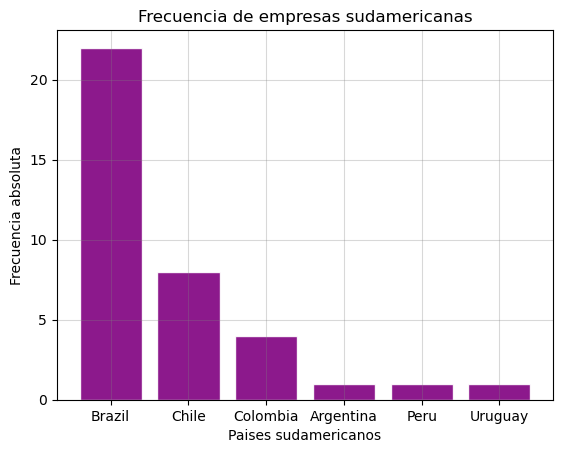

In [76]:
# Bar plot
table_suda=f_suda['Country'].value_counts()
table_suda

plt.bar(table_suda.index,table_suda.values, color = 'purple', alpha = 0.9, edgecolor = 'white') #Crea el gráfico de barras
plt.title('Frecuencia de empresas sudamericanas')
plt.xlabel('Paises sudamericanos')
plt.ylabel('Frecuencia absoluta')
plt.grid(color = 'gray',alpha = 0.3, linestyle = 'solid')

plt.show() #Imprime el gráfico

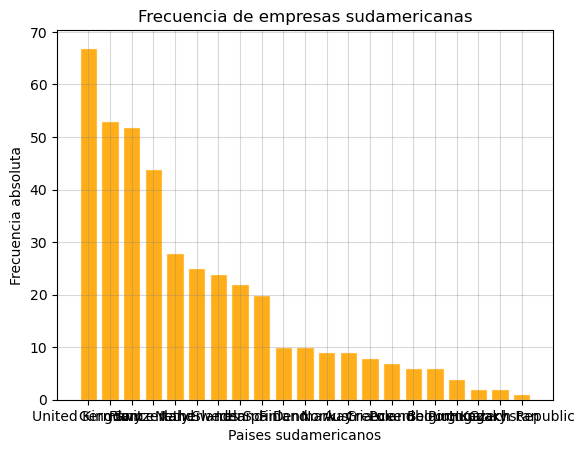

In [77]:
table_europe = f_europe['Country'].value_counts()


plt.bar(table_europe.index,table_europe.values, color = 'orange', alpha = .9, edgecolor = 'white') #Crea el gráfico de barras
plt.title('Frecuencia de empresas sudamericanas')
plt.xlabel('Paises sudamericanos')
plt.ylabel('Frecuencia absoluta')
plt.grid(color = 'gray',alpha = 0.3, linestyle = 'solid')

plt.show() #Imprime el gráfico

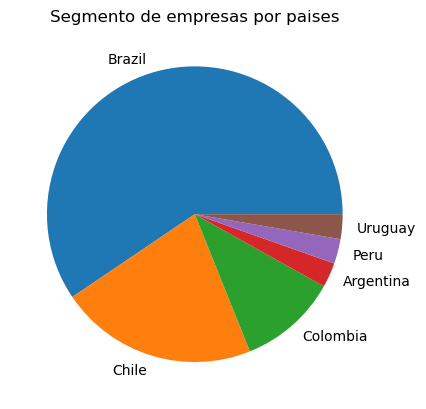

In [78]:
# pie chart

plt.pie(table_suda.values,labels=table_suda.index)
plt.title('Segmento de empresas por paises')

plt.show()

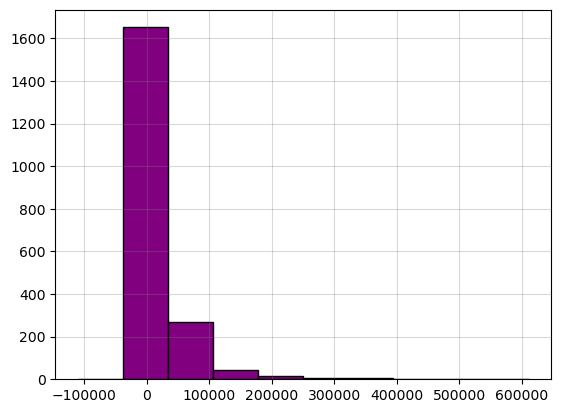

In [79]:
# Histogramas

plt.hist(forbes21["Sales"], color='purple',edgecolor = 'black')
plt.grid(color='gray', linestyle='solid', alpha = 0.3)

plt.show()

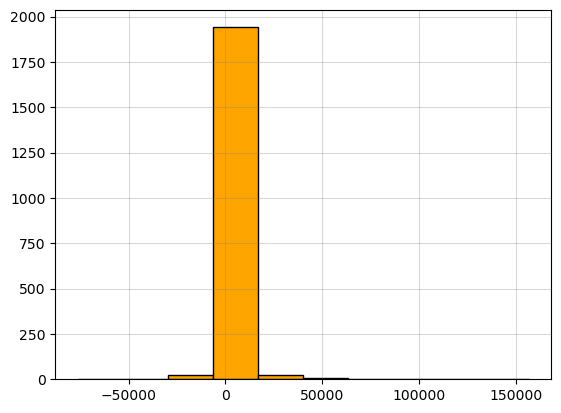

In [80]:
plt.hist(forbes21["Profits"], color='orange',edgecolor = 'black')
plt.grid(color='gray', linestyle='solid', alpha = 0.3)

plt.show()

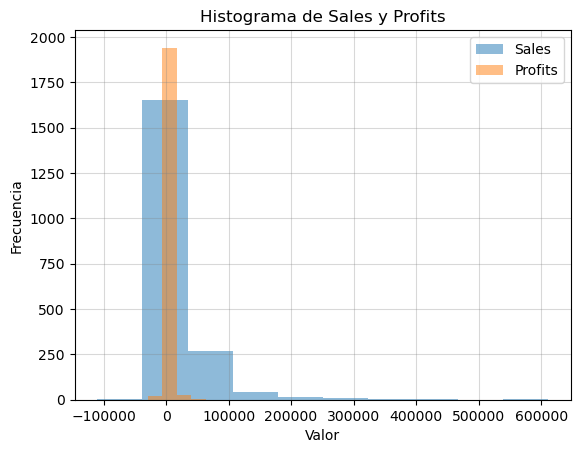

In [81]:
# Crear histograma para la columna "Sales"
plt.hist(forbes21['Sales'], alpha=0.5, label='Sales')

# Crear histograma para la columna "Profits"
plt.hist(forbes21['Profits'], alpha=0.5, label='Profits')

# Agregar leyenda
plt.legend()

# Configurar etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de Sales y Profits')
plt.grid(color='gray', linestyle='solid', alpha = 0.3)


# Mostrar el gráfico
plt.show()

In [83]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.
